In [ ]:
from google.colab import drive
#drive.mount("/content/drive")
#to forcibly remount the drive, comment the above line and uncomment below line.
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pwd
%cd "/content/drive/My Drive/Colab Notebooks"

/content
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install pandas

In [ ]:
import networkx as nx
from networkx.exception import NetworkXError
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import write_dot
import math
from random import randint
import numpy as np
import itertools
import pandas as pd
student_data = pd.read_csv("synthetic_school_enrollment_data.csv")

**Question A**

1. pseudo-code for a basic greedy graph vertex coloring algorithm for the below graph:

- we will asign a color to first vertex and then traverse every vertex and assign color by checking colors assigned to it's adjacent vertices.

- pseudo code

      def greedy_graph_coloring(G,colors):
            for i in range(len(colors)):
                new=[]
                if(colors[i]!=-1): continue
                for u in list(G.adj[i]):
                    new.append(colors[u])
                new=sorted(new)
                new=np.unique(new)
                if new[0]== -1 :
                    new=new[1:]
                me=1
                for j in new :
                    if(me!=j):
                        break
                    me+=1
                colors[i]=me
            return colors
    
- The complexity for this algorithm is **O(V^2 + E)** where V and E are verices and edges of a particular graph

2. This algorithm doesn't always give us the correct solution. The order of vertices play an important role in graph coloring. We might get optimal number of colors when the vertices are ordered in descending order

3. If the vertices are ordered in the desecnding order for the purpose of coloring. Then, the number of colors to be used will optimally be less but cannot be guaranteed. 

4. In Graph coloring problem, several nodes are connected and we should make sure that adjacent verices have same color. Same in Duko puzzles we form a graph like we know in sudoku(9*9) the numbers are connected and form a graph. We will have 81 nodes in the suduko problem. As we see that duko problems can be arranged in graph manner. I say that it is related to graph coloring.


**Question A** simple graph

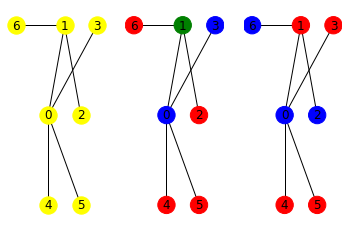

In [ ]:
G=nx.empty_graph(7)
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(1,6)
G.add_edge(0,3)
G.add_edge(0,4)
G.add_edge(0,5)
lis=[(0,0),(2,3),(4,0),(6,3),(0,-3),(4,-3),(-4,3)]
plt.subplot(131)
nx.draw(G,pos=lis,with_labels=True,node_color='yellow')
plt.subplot(132)
nx.draw(G,pos=lis,with_labels=True,node_color=['blue','green','red','blue','red','red','red'])
plt.subplot(133)
nx.draw(G,pos=lis,with_labels=True,node_color=['blue','red','blue','red','red','red','blue'])
#First is the graph with same colors
#second graph is colored bad
#third graph is colored good

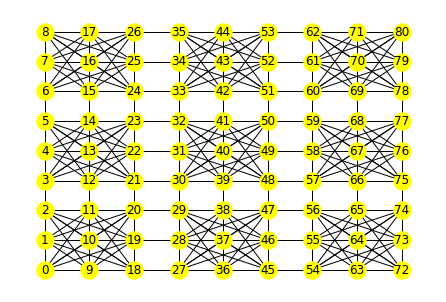

In [ ]:
G=sudoku_graph(3)
lis=visualize()
nx.draw(G,pos=lis,with_labels=True,node_color='yellow')

In [ ]:
def visualize():
  lis=[]
  for i in range(0,81):
    k=(math.floor(i/9),i%9)
    lis.append(k)
  return lis

In [ ]:
def sudoku_graph(n):
    
    G = nx.empty_graph(81)
    for row_no in range(0, 9):
        row_start = row_no * 9
        for j in range(1, 9):
            for i in range(j):
                G.add_edge(row_start + i, row_start + j)


    for col_no in range(0, 9):
        for j in range(col_no, 81, 9):
            for i in range(col_no, j, 9):
                G.add_edge(i, j)


    for band_no in range(n):
        for stack_no in range(n):
            box_start = 27 * band_no + n * stack_no
            for j in range(1, 9):
                for i in range(j):
                    u = box_start + (i % n) + 9 * (i // n)
                    v = box_start + (j % n) + 9 * (j // n)
                    G.add_edge(u, v)

    return G

In [ ]:
def greedy_graph_coloring(G,colors):
    for i in range(len(colors)):
        new=[]
        if(colors[i]!=-1): continue
        for u in list(G.adj[i]):
            new.append(colors[u])
        new=sorted(new)
        new=np.unique(new)
        if new[0]== -1 :
            new=new[1:]
        me=1
        for j in new :
            if(me!=j):
                break
            me+=1
        colors[i]=me
    return colors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 4, 5, 6, 1, 2, 3, 10, 11, 12, 7, 8, 9, 10, 11, 12, 1, 2, 3, 2, 1, 4, 3, 6, 5, 8, 7, 10, 3, 6, 5, 2, 1, 4, 9, 12, 11, 8, 7, 10, 9, 12, 11, 2, 1, 4, 5, 3, 1, 6, 4, 2, 11, 9, 7, 6, 4, 2, 5, 3, 1, 12, 10, 8, 9, 10, 7, 8, 13, 14, 3, 4, 1]


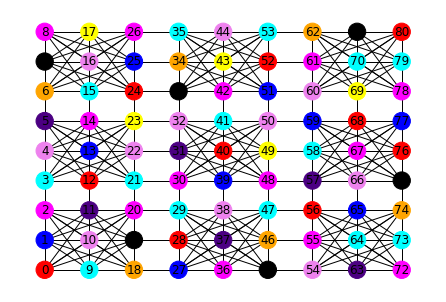

In [ ]:
res=greedy_graph_coloring(G,[-1 for i in range(81)])
temp_colors=[]
for i in res:
  if res[i]==1:
    temp_colors.append('yellow')
  if res[i]==2:
    temp_colors.append('red')
  if res[i]==3:
    temp_colors.append('blue')
  if res[i]==4:
    temp_colors.append('magenta')
  if res[i]==5:
    temp_colors.append('cyan')
  if res[i]==6:
    temp_colors.append('violet')
  if res[i]==7:
    temp_colors.append('indigo')
  if res[i]==8:
    temp_colors.append('orange')
  if res[i]==9:
    temp_colors.append('black')
  if res[i]==10:
    temp_colors.append('pink')
  if res[i]==11:
    temp_colors.append('white')

print(res)
lis=visualize()
nx.draw(G,pos=lis,with_labels=True,node_color=temp_colors)

**Question - B**

In [ ]:
def isValid(row , col, c):
    for i in range(9):
        if board[row][i] != '.' and board[row][i] == c: 
          return False
        if board[i][col] != '.' and board[i][col] == c: 
          return False
    for i in range(3):
        for j in range(3):
            baseRow, baseCol = row - row%3, col - col %3
            current = board[baseRow + i][ baseCol + j]
            if current != '.' and current == c:
              return False
    return True

def dfs(a, b):
  if b == 9:
    return dfs(a + 1, 0)
  if a == 9:
    return True,board
  if board[a][b] != '.':
    return dfs(a, b + 1)
  for c in range(1, 10):
    if not isValid(a, b, str(c)):
      continue
    board[a][b] = str(c)
    if dfs(a, b + 1): 
      return True,board
    board[a][b] = '.'
  return False

**Easy Sudoku for 7-December-2008**

1 2 3 4 5 8 9 7 6 
7 6 4 1 9 2 8 5 3 
5 9 8 7 6 3 1 4 2 
3 5 7 6 1 9 4 2 8 
6 4 1 8 2 5 7 3 9 
9 8 2 3 7 4 6 1 5 
2 3 6 9 4 1 5 8 7 
8 1 9 5 3 7 2 6 4 
4 7 5 2 8 6 3 9 1 


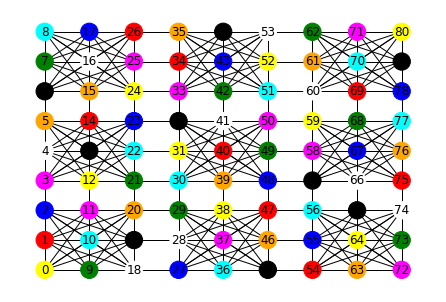

In [ ]:
board = [[".",".","3","4",".","8","9",".","."],
         ["7","6",".","1","9",".","8",".","."],
         ["5",".",".",".",".",".","1",".","2"],
         [".",".",".","6","1",".",".","2","8"],
         [".","4",".","8",".","5",".","3","."],
         ["9","8",".",".","7","4",".",".","."],

         ["2",".","6",".",".",".",".",".","7"],
         [".",".","9",".","3","7",".","6","4"],
         [".",".","5","2",".","6","3",".","."]]
  
(b,res)=dfs(0,0)

col=[]
for i in range(9):
  for j in range(9):
    if res[i][j]=='1':
      col.append('yellow')
    if res[i][j]=='2':
      col.append('red')
    if res[i][j]=='3':
      col.append('blue')
    if res[i][j]=='4':
      col.append('magenta')
    if res[i][j]=='5':
      col.append('white')
    if res[i][j]=='6':
      col.append('cyan')
    if res[i][j]=='7':
      col.append('green')
    if res[i][j]=='8':
      col.append('orange')
    if res[i][j]=='9':
      col.append('black')

for i in range(9):
  for j in range(9):
    print(res[i][j],end=' ')
  print()
lis=visualize()
nx.draw(G,pos=lis,with_labels=True,node_color=col)

**Tough Sudoku for 7-December-2008**

1 3 8 2 4 5 6 7 9 
6 5 9 7 1 8 4 3 2 
7 2 4 9 6 3 1 5 8 
5 7 2 4 8 1 9 6 3 
8 6 3 5 7 9 2 1 4 
4 9 1 3 2 6 5 8 7 
2 4 6 8 5 7 3 9 1 
9 8 5 1 3 2 7 4 6 
3 1 7 6 9 4 8 2 5 


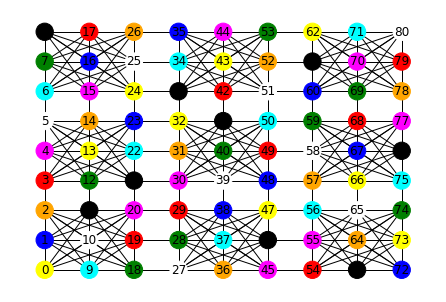

In [ ]:
board = [[".","3","8",".",".",".",".","7","."],
         ["6",".",".",".","1",".",".",".","."],
         [".","2",".","9",".",".",".",".","."],
         [".",".","2",".",".",".",".","6","3"],
         ["8",".",".",".","7",".",".",".","4"],
         ["4","9",".",".",".",".","5",".","."],

         [".",".",".",".",".","7",".","9","."],
         [".",".",".",".","3",".",".",".","6"],
         [".","1",".",".",".",".","8","2","."]]
  
(b,res)=dfs(0,0)

col=[]
for i in range(9):
  for j in range(9):
    if res[i][j]=='1':
      col.append('yellow')
    if res[i][j]=='2':
      col.append('red')
    if res[i][j]=='3':
      col.append('blue')
    if res[i][j]=='4':
      col.append('magenta')
    if res[i][j]=='5':
      col.append('white')
    if res[i][j]=='6':
      col.append('cyan')
    if res[i][j]=='7':
      col.append('green')
    if res[i][j]=='8':
      col.append('orange')
    if res[i][j]=='9':
      col.append('black')

for i in range(9):
  for j in range(9):
    print(res[i][j],end=' ')
  print()
lis=visualize()
nx.draw(G,pos=lis,with_labels=True,node_color=col)

**Question - C**

In [ ]:
courses = list(student_data.columns)[3:]
class_network = nx.Graph()
class_network.add_nodes_from(courses)

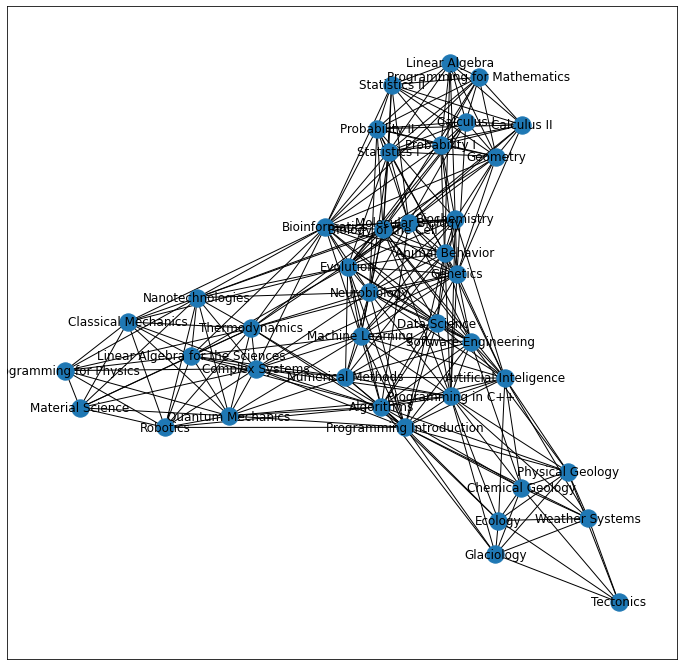

In [ ]:
without_subj = student_data.drop(['Major', 'Minor', 'Unnamed: 0'], axis=1) # We don’t need major and minor for the moment
without_subj = without_subj.T # transposelist_of_overlaps = []
list_of_overlaps=[]
for student in without_subj:
  list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))


for sublist in list_of_overlaps:
   for pair in itertools.combinations(sublist, 2):
      class_network.add_edge(pair[0], pair[1])

fig = plt.figure(figsize=(12,12))
nx.draw_networkx(class_network, with_labels=True)

In [ ]:
def greedy_last(G,colors,courses):
    for i in range(len(colors)):
        new=[]
        if(colors[i]!=-1): continue
        for j in range(len(colors)):
            if i==j:
              continue
            if G.has_edge(courses[i],courses[j]):
              new.append(colors[j])
        new=sorted(new)
        new=np.unique(new)
        if new[0]== -1 :
            new=new[1:]
        me=1
        for j in new :
            if(me!=j):
                break
            me+=1
        colors[i]=me
    return colors

[1, 2, 3, 4, 5, 6, 7, 8, 1, 3, 2, 4, 5, 6, 7, 9, 8, 4, 1, 2, 3, 7, 5, 8, 9, 6, 2, 4, 9, 3, 7, 10, 11, 8, 1, 5, 6, 7, 2, 4]


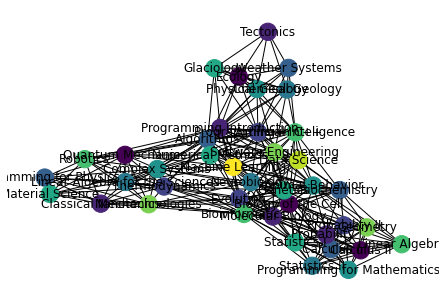

In [ ]:
q=class_network.number_of_nodes()
r1=greedy_last(class_network,[-1 for i in range(q)],courses)
print(r1)
nx.draw(class_network, with_labels=True,node_color=r1)

In [ ]:
colors = [
"lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"]
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}

In [ ]:
from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 6, i, j, 0)
        dates.append(date)
        calendar[date] = []

In [ ]:
for i in range(40):
  calendar[from_color_to_date[colors[r1[i]]]].append(courses[i])


max_number_exams_sync = len(max(list(calendar.values()),key=len))
rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]
pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)

,Room 0,Room 1,Room 2,Room 3,Room 4
2021-06-14 10:00:00,None,None,None,None,None
2021-06-14 12:00:00,Biology of the Cell,Quantum Mechanics,Calculus II,Ecology,None
2021-06-14 14:00:00,Molecular Biology,Classical Mechanics,Probability I,Programming Introduction,Tectonics
2021-06-14 16:00:00,Evolution,Thermodynamics,Probability II,Programming in C++,None
2021-06-15 10:00:00,Biochemistry,Programming for Physics,Calculus I,Algorithms,Weather Systems
2021-06-15 12:00:00,Neurobiology,Linear Algebra for the Sciences,Statistics II,Chemical Geology,None
2021-06-15 14:00:00,Animal Behavior,Complex Systems,Programming for Mathematics,Physical Geology,None
2021-06-15 16:00:00,Genetics,Material Science,Statistics I,Numerical Methods,Glaciology
2021-06-16 10:00:00,Bioinformatics,Robotics,Linear Algebra,Artificial Inteligence,None
2021-06-16 12:00:00,Nanotechnologies,Geometry,Software Engineering,None,None
